# Fraud Detection Case Study

In [1]:
import numpy as np
import pandas as pd
from itertools import *
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC

from numpy.linalg import svd

import matplotlib.pyplot as plt
%matplotlib inline

import random
import cPickle as pickle


In [2]:
data = pd.read_json('../../data.json')

Singular Value Decomposition (To reduce the number of features) -

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html



In [3]:
data.head(3)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA


In [4]:
data['acct_type'].unique()

array([u'fraudster_event', u'premium', u'spammer_warn', u'fraudster',
       u'spammer_limited', u'spammer_noinvite', u'locked', u'tos_lock',
       u'tos_warn', u'fraudster_att', u'spammer_web', u'spammer'], dtype=object)

In [5]:
Counter(data['acct_type'])

Counter({u'fraudster': 437,
         u'fraudster_att': 5,
         u'fraudster_event': 851,
         u'locked': 54,
         u'premium': 12373,
         u'spammer': 1,
         u'spammer_limited': 218,
         u'spammer_noinvite': 84,
         u'spammer_warn': 144,
         u'spammer_web': 2,
         u'tos_lock': 77,
         u'tos_warn': 91})

In [6]:
# data[data['acct_type']=='locked']

In [7]:
a_loon = {'fraudster': 1, 'fraudster_att': 1, 'fraudster_event': 1, 'locked': 1, 'premium': 0}


In [8]:
df_first = data[(data['acct_type']=='fraudster') | (data['acct_type']=='fraudster_att') | (data['acct_type']=='fraudster_event')
    | (data['acct_type']=='premium')]

In [9]:
y = df_first['acct_type'].map(a_loon)

In [10]:
df_first.columns

Index([u'acct_type', u'approx_payout_date', u'body_length', u'channels',
       u'country', u'currency', u'delivery_method', u'description',
       u'email_domain', u'event_created', u'event_end', u'event_published',
       u'event_start', u'fb_published', u'gts', u'has_analytics',
       u'has_header', u'has_logo', u'listed', u'name', u'name_length',
       u'num_order', u'num_payouts', u'object_id', u'org_desc',
       u'org_facebook', u'org_name', u'org_twitter', u'payee_name',
       u'payout_type', u'previous_payouts', u'sale_duration',
       u'sale_duration2', u'show_map', u'ticket_types', u'user_age',
       u'user_created', u'user_type', u'venue_address', u'venue_country',
       u'venue_latitude', u'venue_longitude', u'venue_name', u'venue_state'],
      dtype='object')

In [11]:
# df_first[(df_first['fb_published'] == 1) & (df_first['acct_type'] == 'premium') ]

In [12]:
df_first['regi_use_time_delta'] = df_first['event_created'] - df_first['user_created']

/home/sanhita/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
# df_first[['regi_use_time_delta', 'acct_type']]

In [14]:
df_first[df_first['acct_type'].str.contains('fraud')]['regi_use_time_delta'].mean()

7528982.6055684453

In [15]:
df_first[df_first['acct_type'].str.contains('premium')]['regi_use_time_delta'].mean()

34292148.041461244

In [16]:
col = 'show_map'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.756380510441

0.850804170370969

In [17]:
col = 'fb_published'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.0224284609435

0.13569869877960075

In [18]:
col = 'has_logo'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.645784996133

0.86106845550796085

In [19]:
col = 'has_header'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.0693641618497

0.21320754716981133

In [20]:
col = 'org_facebook'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

1.03554119548

8.60037189748565

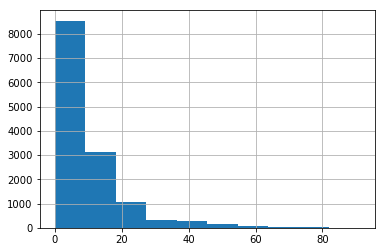

In [21]:
df_first['org_facebook'].hist()

In [22]:
col = 'listed'
yn_map = {'y': 1, 'n' : 0}
df_first['listed'] = df_first['listed'].map(yn_map)
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.832173240526

/home/sanhita/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0.85702739836741293

In [23]:
col = 'org_twitter'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.294022617124

4.652680087315062

In [24]:
col = 'sale_duration'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

14.1259574468

50.395477020345304

In [25]:
col = 'gts'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

1911.21436195

2531.424853309616

In [26]:
col = 'has_analytics'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.0030935808198

0.082033459953123736

In [27]:
df_first.columns

Index([          u'acct_type',  u'approx_payout_date',         u'body_length',
                  u'channels',             u'country',            u'currency',
           u'delivery_method',         u'description',        u'email_domain',
             u'event_created',           u'event_end',     u'event_published',
               u'event_start',        u'fb_published',                 u'gts',
             u'has_analytics',          u'has_header',            u'has_logo',
                    u'listed',                u'name',         u'name_length',
                 u'num_order',         u'num_payouts',           u'object_id',
                  u'org_desc',        u'org_facebook',            u'org_name',
               u'org_twitter',          u'payee_name',         u'payout_type',
          u'previous_payouts',       u'sale_duration',      u'sale_duration2',
                  u'show_map',        u'ticket_types',            u'user_age',
              u'user_created',           u'user_type

In [28]:
col = 'name_length'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

29.9752513534

42.479915946011474

In [29]:
col = 'payee_name'
df_first[df_first[col]==u''][['acct_type', col]]
f_name = df_first[(df_first['acct_type'].str.contains('fraud')) & (df_first[col]==u'')]['acct_type'].count()
p_name = df_first[(df_first['acct_type'].str.contains('premium')) & (df_first[col]==u'')]['acct_type'].count()

print f_name*1.0 / len(df_first[df_first['acct_type'].str.contains('fraud')]), 
p_name*1.0 / len(df_first[df_first['acct_type'].str.contains('premium')])

0.976798143852

0.75850642528085344

In [30]:
col = 'payout_type'
df_first[col].unique()
# df_first[(df_first['acct_type'].str.contains('premium')) & (df_first[col] != 'CHECK') & (df_first[col] != 'ACH')][['acct_type', col]]

array([u'', u'CHECK', u'ACH'], dtype=object)

In [31]:
df_first[(df_first['acct_type'].str.contains('fraud')) & (df_first[col] != 'CHECK') & (df_first[col] != 'ACH')][['acct_type', col]]

,acct_type,payout_type
0,fraudster_event,
183,fraudster,
187,fraudster_event,
212,fraudster_event,
219,fraudster_event,
289,fraudster_event,
296,fraudster_event,
307,fraudster_event,
330,fraudster_event,
440,fraudster_event,


In [32]:
col = 'num_payouts'
# df_first[col]
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.582366589327

37.432635577467067

In [33]:
col = 'name_length'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

29.9752513534

42.479915946011474

In [34]:
col = 'previous_payouts'

df_first[df_first['acct_type'].str.contains('premium')][col]


for i in xrange(len(df_first)):
    
    len(df_first[col][0])

In [35]:
col = 'previous_payouts'
length_list = []

for i in xrange(len(df_first)):
#     length_list.append(len(df_first[col][i]))
    length_list.append(((len(df_first.iloc[i][col]), i)))
    
max(length_list)

(2048, 12138)

In [36]:
for i in xrange(10):
    if 'premium' in str(df_first['acct_type'][i]):
        print True
    elif 'fraud' in str(df_first['acct_type'][i]):
        print False
    else:
        print 'Bummer'

False
True
True
True
True
True
True
True
True
True


In [37]:
col = 'previous_payouts'
length_list_fraud = []
length_list_gen = []

for i in xrange(len(df_first)):
    if 'premium' in str(df_first['acct_type'][i]):
        length_list_gen.append(((len(df_first.iloc[i][col]), i)))
    elif 'fraud' in str(df_first['acct_type'][i]):
        length_list_fraud.append(((len(df_first.iloc[i][col]), i)))
    else : 
        continue

print max(length_list_gen), min(length_list_gen), np.mean(length_list_gen)

KeyError: 13

In [189]:
df_first.iloc[12138][['acct_type', col]]

acct_type                                                     premium
previous_payouts    [{u'name': u'Seneca Lake Winery Association', ...
Name: 12732, dtype: object

In [91]:
col = 'ticket_types'
type(df_first[col][0][0])

dict

In [184]:
col = 'ticket_types'
length_list = []

for i in xrange(len(df_first)):
#     length_list.append(len(df_first[col][i]))
    length_list.append(((len(df_first.iloc[i][col]), i)))
    
max(length_list)

(116, 9258)

In [186]:
df_first.iloc[9258][col]

[{u'availability': 1,
  u'cost': 100.0,
  u'event_id': 3814948,
  u'quantity_sold': 8,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 75.0,
  u'event_id': 3814948,
  u'quantity_sold': 4,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 75.0,
  u'event_id': 3814948,
  u'quantity_sold': 4,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 2,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 6,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 8,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 4,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 3,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 2,
  u'quantity_total': 1},


In [107]:
lst = df_first[col]

In [134]:
len(df_first)
for i in xrange(50):
    t = pd.DataFrame(lst[i])
    print i, t.iloc[:, 3].sum(), df_first['acct_type'][i]

0 0 fraudster_event
1 25 premium
2 48 premium
3 58 premium
4 39 premium
5 37 premium
6 36 premium
7 57 premium
8 14 premium
9 64 premium
10 33 premium
11 21 premium
12 7 premium


KeyError: 13

In [109]:
df_tt

,ticket_types
0,"[{u'event_id': 527017, u'cost': 25.0, u'availa..."
1,"[{u'event_id': 786878, u'cost': 35.0, u'availa..."
2,"[{u'event_id': 787337, u'cost': 93.51, u'avail..."
3,"[{u'event_id': 885645, u'cost': 25.0, u'availa..."
4,"[{u'event_id': 1114349, u'cost': 150.0, u'avai..."
5,"[{u'event_id': 1179983, u'cost': 8.0, u'availa..."
6,"[{u'event_id': 1180179, u'cost': 22.63, u'avai..."
7,"[{u'event_id': 1180391, u'cost': 14.0, u'avail..."
8,"[{u'event_id': 1180423, u'cost': 250.0, u'avai..."
9,"[{u'event_id': 1180435, u'cost': 14.0, u'avail..."
